### Portofolio Analisis Data Menggunakan Python

# **Import** **Librarries**

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load Data

In [ ]:
df = pd.read_csv('online_retail.csv')

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Create New Feature: Year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Pengamatan Data

1. Data terdiri dari 1.067.371 Baris
2. Terdapat beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris) yaitu pada kolom Customer_ID
3. Tipe kolom InvoiceDate memiliki tipe yang kurang tepat. maka harus diubah menajdi datetime

In [37]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
Year                0
dtype: int64

Jika ada kolom dengan data null/kosong yang sangat banyak, maka kolom tersebut bisa dihapus aja

In [38]:
df.dropna(inplace=True)
df.shape

(824364, 9)

In [39]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Year           0
dtype: int64

Dapat dilihat, data null sudah tidak ada

In [40]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [41]:
df['Year'] = (df["InvoiceDate"].dt.year)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
 8   Year         824364 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 62.9+ MB


Tipe kolom Invoicedate sudah diubah menjadi datetime

### Filtering Data

In [43]:
df.sort_values('Quantity').head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France,2010


Karena terdapat nilai Quantity (-) maka data harus difilter, yang mana Quantity harus >0
dan data sebelum di filter memiliki jumlah 

In [44]:
df.shape[0]

824364

Data sebelum difilter memiliki jumlah baris 824.364

In [45]:
df[df['Quantity'] > 0].shape[0]

805620

setelah difilter jumlah baris pada data berkurang, haltersebut dikarenakan data diambil yang memiliki Quantity >0

### Create New Feature: Revenue

In [46]:
df[df['Invoice'].str.contains('C')].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009


Pada kolom invoice yang memiliki huruf C didepannya menandakan pelanggan membatalkan pesanan tersebut. maka untuk menghitung revenue selain memfilter Quantity kita juga harus memfilter invoice

In [47]:
df_fil = df[ (df['Quantity'] > 0) & (~df['Invoice'].str.contains('C')) ]

In [48]:
df_fil.sort_values('Quantity').head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2011
597889,542246,22846,BREAD BIN DINER STYLE RED,1,2011-01-26 15:31:00,16.95,15227.0,United Kingdom,2011
597872,542243,82616B,FRAPPUCINO SCARF KNITTING KIT,1,2011-01-26 15:00:00,2.95,17841.0,United Kingdom,2011
597867,542243,47590A,BLUE HAPPY BIRTHDAY BUNTING,1,2011-01-26 15:00:00,5.45,17841.0,United Kingdom,2011
597865,542243,22384,LUNCH BAG PINK POLKADOT,1,2011-01-26 15:00:00,1.65,17841.0,United Kingdom,2011


In [49]:
df_fil[df_fil['Invoice'].str.contains('C')].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year


Setelah melakukan filter data dapat dilihat Quantity < 0 dan Invoice yang memiliki huruf C didepan sudah tidak ada

In [ ]:
df_fil['Revenue'] = (df_fil['Quantity']) * (df_fil['Price'])

Untuk mencari Revenue, dapat dengan cara nilai Quantity dikali dengan Price. Penggunaan rumus diatas supaya hasil perkalian Revenue menjadi sebuah kolom

In [51]:
df_fil.sort_values(['Revenue'], ascending=[False]).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011,168469.6
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,77183.6
748132,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,2011,38970.0
432176,530715,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,2010-11-04 11:36:00,1.69,15838.0,United Kingdom,2010,15818.4
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom,2010,10953.5


Dapat dilihat kolom Revenue berada diujung kanan

### Average of Revenue per Year

**Data tersebut terlihat tidak normal dikarenakan adanya outlier**

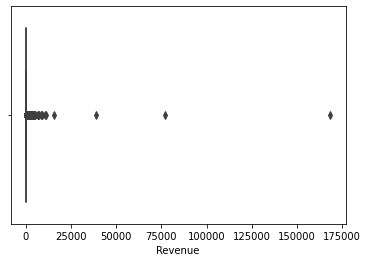

In [52]:
sns.boxplot(x='Revenue', data=df_fil)

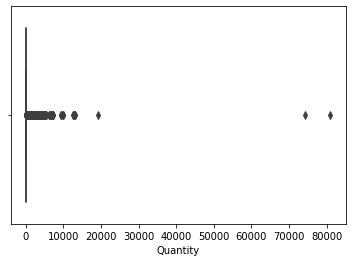

In [53]:
sns.boxplot(x='Quantity', data=df_fil)

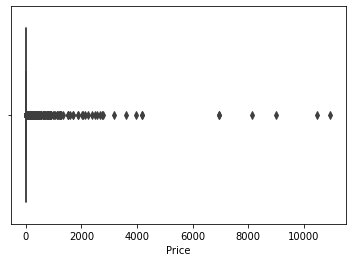

In [54]:
sns.boxplot(x='Price', data=df_fil)

Maka data harus difilter terlebih dahulu

In [59]:
print('Jumlah baris sebelum memfilter outlier:', len(df_fil))

Q1 = df_fil['Revenue'].quantile(0.25)
Q3 = df_fil['Revenue'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df_out = df_fil[(df_fil["Revenue"] >= low_limit) &
        (df_fil["Revenue"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df_out)}')

Jumlah baris sebelum memfilter outlier: 805620
Jumlah baris setelah memfilter outlier: 739238


In [62]:
print('Jumlah baris sebelum memfilter outlier:', len(df_fil))

Q1 = df_fil['Quantity'].quantile(0.25)
Q3 = df_fil['Quantity'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df_out = df_fil[(df_fil["Quantity"] >= low_limit) &
        (df_fil["Quantity"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df_out)}')

Jumlah baris sebelum memfilter outlier: 805620
Jumlah baris setelah memfilter outlier: 753626


In [65]:
print('Jumlah baris sebelum memfilter outlier:', len(df_fil))

Q1 = df_fil['Price'].quantile(0.25)
Q3 = df_fil['Price'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df_out = df_fil[(df_fil["Price"] >= low_limit) &
        (df_fil["Price"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df_out)}')

Jumlah baris sebelum memfilter outlier: 805620
Jumlah baris setelah memfilter outlier: 738274


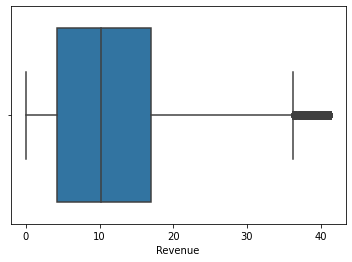

In [60]:
sns.boxplot(x='Revenue', data=df_out)

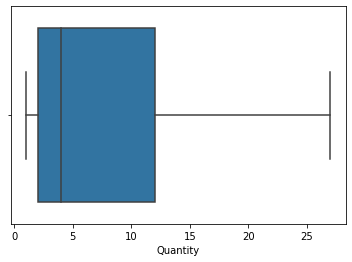

In [63]:
sns.boxplot(x='Quantity', data=df_out)

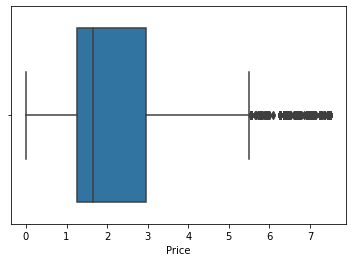

In [66]:
sns.boxplot(x='Price', data=df_out)

In [67]:
dfg = df_out.groupby('Year')['Revenue'].mean().reset_index()

In [68]:
dfg

,Year,Revenue
0,2009,21.532360
1,2010,20.136561
2,2011,21.143878


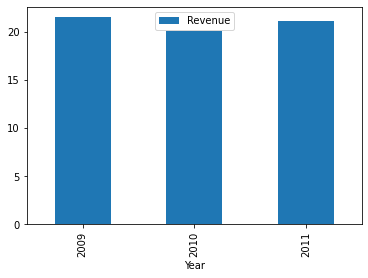

In [69]:
dfg.plot(x = 'Year', y = 'Revenue', kind = 'bar')

Dapat disimpulkan bahwa perbedaan rata-rata Revenue tidak signifikan

#### Customers who finished their purchases

In [73]:
df_out.shape[0]

738274

Data tersebut sudah cleaning

In [ ]:
finish = df_fil[df_fil['Customer ID'].notna()]

mencari data yang tidak null

In [71]:
df_out['Invoice'].count()

738274

Jumlah Customer yang menyelesaikan pembayaran adalah 738.271

#### Customers who canceled their purchases

In [74]:
cancel = df[df['Invoice'].str.contains('C')]

In [75]:
cancel.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009


In [76]:
cancel.shape[0]

18744

Jumlah Customer yang membatalkan pembayaran adalah 18.744

### Number of Finished and Canceled Transactions Each Year

In [77]:
df_finish = df_out.groupby('Year')['Invoice'].count().reset_index()

In [78]:
df_finish

,Year,Invoice
0,2009,28650
1,2010,369880
2,2011,339744


In [79]:
df_cancel = cancel.groupby('Year')['Invoice'].count().reset_index()

In [80]:
df_cancel

,Year,Invoice
0,2009,999
1,2010,9530
2,2011,8215


<BarContainer object of 3 artists>

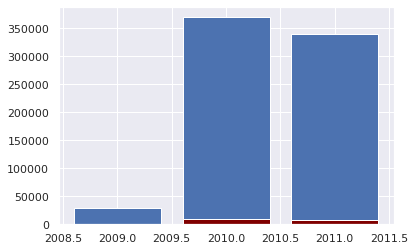

In [100]:

df = pd.DataFrame({
    'Year': [2009, 2010, 2011],
    'Number of Finished': [28650, 369880, 339744],
    'Number of Canceled': [999, 9530, 8215]
})
  
ax = plt.subplot()
ax.bar(df["Year"], df["Number of Finished"])
ax.bar(df["Year"], df["Number of Canceled"], color="maroon")



###**Cancellation** Rate

In [93]:
cancellation_rate1 = (9999/28650) *100

In [91]:
cancellation_rate2 = (9530/369880) *100

In [92]:
cancellation_rate3 = (8215/339744) *100

In [94]:
cancellation_rate1

34.90052356020942

In [95]:
cancellation_rate2

2.5765113009624745

In [96]:
cancellation_rate3

2.4179970801544695

<BarContainer object of 3 artists>

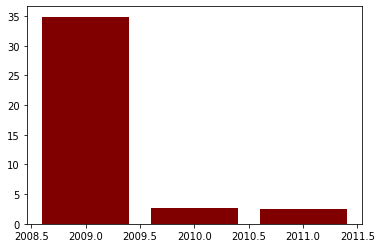

In [97]:
df = pd.DataFrame({
    'Year': [2009, 2010, 2011],
    'Cancellation Rate': [34.90, 2.58, 2.42],
})
  
ax = plt.subplot()
ax.bar(df["Year"], df["Cancellation Rate"], color="maroon")
